# Klasyfikacja na podstawie bazy danych - Airline Passenger Satisfaction </h1>

Podział pracy
- [1. Baza danych](#1.-Baza-danych)
- [2. Preprocessing](#2.-Preprocessing)
  * [2.1 Usuwanie błędnych danych](#2.1-Usuwanie-błędnych-danych)
  * [2.2 Usuwanie brakujących danych](#2.2-Usuwanie-brakujących-danych)
  * [2.3 Optymalizowanie struktury](#2.3-Optymalizowanie-struktury)
  * [2.4 Normalizacja](#2.4-Normalizacja)
- [3. Klasyfikatory](#3.-Klasyfikatory)
  * [3.1 Decision Tree - Drzewo decyzyjne](#3.1-Decision-Tree---Drzewo-decyzyjne)
    * [3.1.1 Baza podstawowa](#3.1.1-Baza-podstawowa)
    * [3.1.2 Baza pełna](#3.1.2-Baza-pełna)
  * [3.2 Naiwny Bayes](#3.2-Naiwny-Bayes)
    * [3.2.1 Baza Podstawowa](#3.2.1-Baza-Podstawowa)
    * [3.2.2 Baza pełna](#3.2.2-Baza-pełna)
  * [3.3 K-Najbliższych sąsiadów](#3.3-K-Najbliższych-sąsiadów)
    * [3.3.1 Baza podstawowa](#3.3.1-Baza-podstawowa)
    * [3.3.2 Baza pełna](#3.3.2-Baza-pełna)
  * [3.4 Sieć neuronowa](#3.4-Sieć-neuronowa)
    * [3.4.1 Baza podstawowa](#3.4.1-Baza-podstawowa)
    * [3.4.2 Baza pełna](#3.4.2-Baza-pełna)
- [4. Podsumowanie](#4.-Podsumowanie)



# 1. Baza danych 
Baza danych składa się z 25 kolumn, i 25976 rekordów. Bada ona satysfakcję klientów pewnej linii lotniczej na podstawie ankiet wypełnionych przez pasażerów.

<p> Przykładowe dane:

In [55]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

df=pd.read_csv('/data/notebook_files/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<h3>W bazie występują następujące kolumny: </h3>
<ul>
  <li>Gender: Płeć (Female, Male)</li>
  <li>Customer Type: Typ klienta (Loyal customer, disloyal customer)</li>
  <li>Age: Wiek klienta</li>
  <li>Type of Travel: Cel lotu (Personal Travel, Business Travel)</li>
  <li>Class: Klasa podróży (Business, Eco, Eco Plus)</li>
  <li>Flight distance: Dystans lotu</li>
  </ul>
  Poniższe kolumny mają wartości w skali (0:Nie dotyczy;1(słabo)-5(bardzo dobrze))
  <br>
  <br>
  <ul>
  <li>Inflight wifi service: Zadowolenie z sieci wifi</li>
  <li>Departure/Arrival time convenient: Zadowolenie z godzin przylotu i odlotu</li>
  <li>Ease of Online booking: Satysfakcja z bookowania lotu</li>
  <li>Gate location: Satysfakcja z lokalizacji gate'a</li>
  <li>Food and drink: Satysfakcja z jedzenia</li>
  <li>Online boarding: Satysfakcja z online boardingu</li>
  <li>Seat comfort: Satyskacja z komfortu siedzenia</li>
  <li>Inflight entertainment: Satysfakcja z systemu rozrywki pokładowej</li>
  <li>On-board service: Satysfakcja z serwisu on-board</li>
  <li>Leg room service: Satysfakcja z miejsca na nogi</li>
  <li>Baggage handling: Satysfakcja z obsługi bagażu</li>
  <li>Check-in service: Satysfakacja z serwisu check-in</li>
  <li>Inflight service: Satysfakcja z obsługi podczas lotu</li>
  <li>Cleanliness: Satysfakcja z czystości</li>
  </ul>
  <ul>
  <li>Departure Delay in Minutes: Opóźnienie odlotu w minutach</li>
  <li>Arrival Delay in Minutes: Opóźnienie przylotu w minutach</li>
  <li>Satisfaction: Ostateczne zadowolenie (satisfied, neutral or dissatisfaction)</li>
</ul>

Kolumną którą będziemy "odgadywać" będzie Satisfaction, są możliwe tam tylko dwie opcje "satisfied" albo "neutral or dissatisfied".

# 2. Preprocessing 

Na podstawie powyższych danych, musimy trochę zmienić strukturę bazy danych. Istnieje kilka zmiennych kategorycznych, które trzeba zakodować. Należy również usunąć niepotrzebne kolumny i sprawdzić poprawność danych.

Dane zostaną przetworzone w dwóch wersjach - data_basic (baza podstawowa) i data_full (baza pełna).

|                                  | **data_basic** | **data_full** |
|----------------------------------|----------------|---------------|
| Usunięcie niepotrzebnych kolumn  |       TAK      |      TAK      |
| Usunięcie błędnych danych        |       TAK      |      TAK      |
| Usunięcie brakujących danych     |       TAK      |      TAK      |
| Badanie optymalizacji struktury  |       TAK      |      TAK      |
| Wyeliminowanie pól 'Nie dotyczy' |       NIE      |      TAK      |
| Normalizacja (przeskalowanie)    |       NIE      |      TAK      |




## 2.1 Usuwanie błędnych danych

In [3]:
data_basic = df.drop(df.iloc[:,[0, 1]], axis = 1) # usuwamy dwie pierwsze kolumny (unnamed i id),
                                                # bo nic nie wnoszą do naszego wyniku
data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

Wnioski na podstawie powyzszego raportu:
- W kolumnie "Arrival Delay in Minutes" jest 25893 nie-pustych wartości, czyli brakuje 83 wartości.
- W bazie występują 3 typy danych: float64(1), int64(17), napisy(3) - mozna je ograniczyć do dwóch.
- Napisy trzeba zakodować.


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


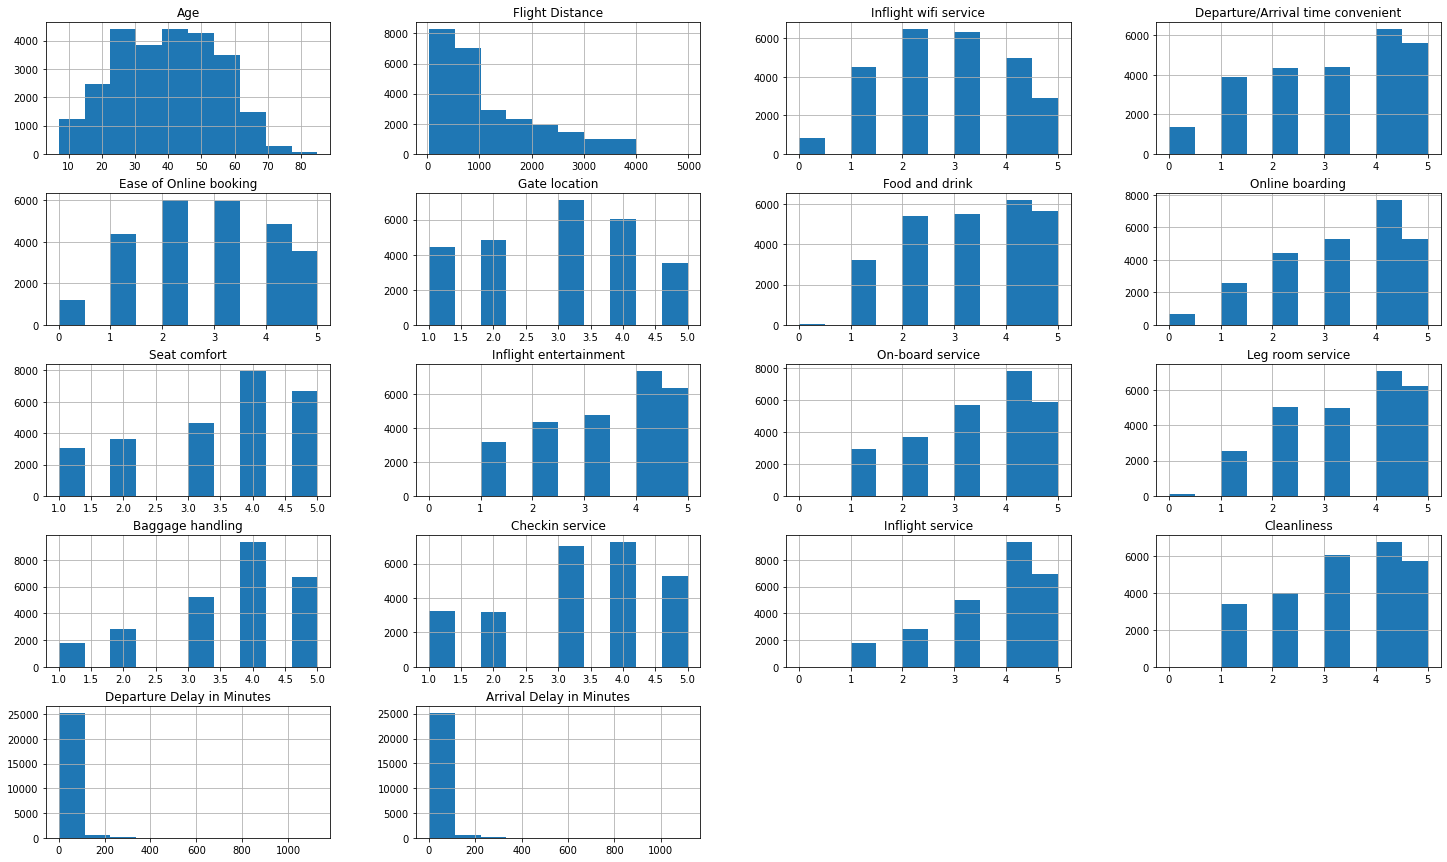

In [4]:
data_basic.hist(figsize=(25,15))
df.describe()

Na podstawie powyższego raportu widać, że w żadnej z kolumn wartości min/max nie są ani wyższe, ani niższe niż oczekiwane.
Na wykresach dla wartości numerycznych można zobaczyć w jakich ilościach i jakie wartości wystepują w danych kolumnach. Wszystkie dane się zgadzają.                                   
<br>
<br>
Wiedząc że w większości kolumn występują same wartości typu float i int, które sa prawidłowe, sprawdzamy teraz tylko unikalne wartości w polach z napisami.

In [5]:
unikalne_wartosci_gen = data_basic['Gender'].unique()
print("Gender: "+unikalne_wartosci_gen)
unikalne_wartosci_ct = data_basic['Customer Type'].unique()
print("Customer: "+unikalne_wartosci_ct)
unikalne_wartosci_tt = data_basic['Type of Travel'].unique()
print("Travel: "+unikalne_wartosci_tt)
unikalne_wartosci_cl = data_basic['Class'].unique()
print("Class: "+unikalne_wartosci_cl)
unikalne_wartosci_sa = data_basic['satisfaction'].unique()
print("Satisfaction: "+unikalne_wartosci_sa)

['Gender: Female' 'Gender: Male']
['Customer: Loyal Customer' 'Customer: disloyal Customer']
['Travel: Business travel' 'Travel: Personal Travel']
['Class: Eco' 'Class: Business' 'Class: Eco Plus']
['Satisfaction: satisfied' 'Satisfaction: neutral or dissatisfied']


W polach z tekstem występują tylko wartości właściwe. Nie ma tam żadnych pól typu "n/a" czy podobnych. Zatem, wszystkie dane są w poprawnej formie.

##  2.2 Usuwanie brakujących danych
W tej części należy zająć się brakującymi wartościami w kolumnie "Arrival Delay in Minutes". Dane zostaną uzupełnione metodą imputacji. W puste pola zostanie wstawiona mediana danych w tej kolumnie. Pozwoli to szybko uzupełnić dane, jednocześnie nie wpływając mocno na ostateczny wynik.

In [6]:
data_basic['Arrival Delay in Minutes'].fillna(data_basic['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
data_basic.isna().sum()
# po zmianach nie ma pustych pól.

Gender 0
Customer Type 0
Age 0
Type of Travel 0
Class 0
Flight Distance 0
Inflight wifi service 0
Departure/Arrival time convenient 0
Ease of Online booking 0
Gate location 0
Food and drink 0
Online boarding 0
Seat comfort 0
Inflight entertainment 0
On-board service 0
Leg room service 0
Baggage handling 0
Checkin service 0
Inflight service 0
Cleanliness 0
Departure Delay in Minutes 0
Arrival Delay in Minutes 0
satisfaction 0
dtype: int64

## 2.3 Optymalizowanie struktury

([<matplotlib.patches.Wedge at 0x7fe8581566a0>,
 [Text(-0.20957359088360364, 1.0798513369923437, 'Neutral or dissatisfied'),
  Text(0.20957359088360372, -1.0798513369923437, 'Satisfied')],
 [Text(-0.11431286775469288, 0.5890098201776419, '56.1%'),
  Text(0.11431286775469293, -0.5890098201776419, '43.9%')])

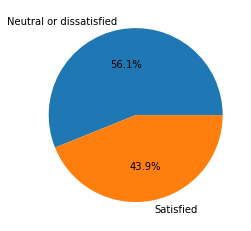

In [7]:
import matplotlib.pyplot as plt
plt.pie(data_basic.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')

Dane do sklasyfikowania są mniej więcej równe. 44% Bazy to wyniki satysfkacjonujące, więc nie ma potrzeby dodawać lub usuwać rekordów. Modele powinny być zdolne do rozpoznania obu kategorii.

In [8]:
'''
Należy jeszcze zakodować wartości tekstowe na liczby.

Wartościom tekstowym zostaną przypisane liczby, np. dla kolumny Gender
0 - Female,
1 - Male
I tak podobnie w kolejnych kolumnach tekstowych.
'''
from sklearn.preprocessing import LabelEncoder # enkodowanie tekstowych pól

le = LabelEncoder()
data_basic['Gender'] = le.fit_transform(data_basic['Gender'])
data_basic['Customer Type'] = le.fit_transform(data_basic['Customer Type'])
data_basic['Type of Travel'] = le.fit_transform(data_basic['Type of Travel'])
data_basic['Class'] = le.fit_transform(data_basic['Class'])


Na tym etapie kończy się praca nad zbiorem z podstawowym processingiem. Od teraz dane będą przechowywane w *data_full*.

Zajmiemy się teraz kolumnami z oceną poszczególnych elementów podróży, które są podane w skali 0-5. Chcemy wyeliminować pola z wartością 0 - Nie dotyczy. Z uwagi na to iż występują w wielu miejscach, w ich miejsce wstawiamy w pustą komórkę dominantę dla danej zmiennej (kolumny), ale uwzględniając tylko próbki z tą samą klasą, co edytowany wiersz.

In [11]:
data_full = data_basic.copy() # skopiuj oryginalny zbiór danych
kolumny = ["Inflight wifi service","Departure/Arrival time convenient",
           "Ease of Online booking","Gate location",
           "Food and drink","Online boarding","Seat comfort",
           "Inflight entertainment","On-board service","Leg room service",
           "Baggage handling","Checkin service","Inflight service","Cleanliness"]

for kolumna in kolumny:
    for klasa in data_full['satisfaction'].unique(): # pętla po unikalnych klasach w kolumnie "satisfaction"
        dominanta = data_full.loc[data_full['satisfaction']==klasa, kolumna].mode()[0] # oblicz dominante tylko dla próbek z tą samą klasą co edytowany wiersz
        data_full.loc[(data_full['satisfaction']==klasa) & (data_full[kolumna]==0), kolumna] = dominanta # zastąp 0 dominanta tylko dla próbek z tą samą klasą co edytowany wiersz
        print("Dla klasy ", klasa, " w kolumnie ", kolumna, " zmieniono wartości 0 na: ", dominanta)

data_full.head()


Dla klasy  satisfied  w kolumnie  Inflight wifi service  zmieniono wartości 0 na:  4
Dla klasy  neutral or dissatisfied  w kolumnie  Inflight wifi service  zmieniono wartości 0 na:  2
Dla klasy  satisfied  w kolumnie  Departure/Arrival time convenient  zmieniono wartości 0 na:  4
Dla klasy  neutral or dissatisfied  w kolumnie  Departure/Arrival time convenient  zmieniono wartości 0 na:  4
Dla klasy  satisfied  w kolumnie  Ease of Online booking  zmieniono wartości 0 na:  4
Dla klasy  neutral or dissatisfied  w kolumnie  Ease of Online booking  zmieniono wartości 0 na:  2
Dla klasy  satisfied  w kolumnie  Gate location  zmieniono wartości 0 na:  3
Dla klasy  neutral or dissatisfied  w kolumnie  Gate location  zmieniono wartości 0 na:  3
Dla klasy  satisfied  w kolumnie  Food and drink  zmieniono wartości 0 na:  4
Dla klasy  neutral or dissatisfied  w kolumnie  Food and drink  zmieniono wartości 0 na:  3
Dla klasy  satisfied  w kolumnie  Online boarding  zmieniono wartości 0 na:  4
Dla k

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,1,1,20,0,1,192,2,4,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,1,0,44,0,0,3377,4,4,4,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 2.4 Normalizacja
Przeskalowujemy wartości liczbowe, za pomocą standaryzacji. Ma ona na celu doprowadzenie wartości danych do standardowego przedziału, w którym ich średnia wartość wynosi 0, a odchylenie standardowe wynosi 1. Jest to technika, która pozwala na porównywanie różnych cech (zmiennych) w jednym zbiorze danych i łatwiejszą interpretację wyników. Następuje ona w każdej kolumnie, za pomocą wzoru: $ y = \frac{x - \text{mean}}{\text{sd}}$.

In [24]:
from sklearn.preprocessing import StandardScaler

kolumny_numeryczne = ["Gender","Customer Type","Age","Type of Travel","Flight Distance","Class",
                 "Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
                 "Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
                 "On-board service","Leg room service","Baggage handling","Checkin service",
                 "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]


# Utwórz obiekt StandardScaler
scaler = StandardScaler()

# Przeskaluj kolumny numeryczne
data_full[kolumny_numeryczne] = scaler.fit_transform(data_full[kolumny_numeryczne])
data_full.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.985932,-0.476040,0.817887,-0.663378,0.652923,-1.035171,1.769652,0.542883,0.117204,0.797831,-0.165067,0.508483,-0.340303,1.227251,1.259257,1.255453,1.161716,-1.035348,1.144219,1.299060,0.953810,0.782208,satisfied
1,-0.985932,-0.476040,-0.239238,-0.663378,-0.950436,1.671443,-1.429490,-1.656419,0.117204,-1.542065,1.341006,0.508483,1.174774,0.479671,0.479062,0.485439,0.311739,-0.247517,0.296925,1.299060,-0.382286,-0.392188,satisfied
2,1.014269,2.100665,-1.296363,-0.663378,0.652923,-1.003128,-0.629705,0.542883,-0.657870,0.797831,-0.918104,-1.085670,-1.097842,-1.015491,0.479062,-1.824605,-0.538238,-1.035348,-1.397663,-0.975382,-0.382286,-0.392188,neutral or dissatisfied
3,1.014269,-0.476040,0.289325,-0.663378,-0.950436,2.186131,-0.629705,0.542883,-0.657870,-0.762100,-0.165067,0.508483,0.417235,-1.763071,-1.861523,-1.824605,-2.238193,-0.247517,-2.244957,0.540913,-0.382286,-0.232043,satisfied
4,-0.985932,-0.476040,0.619676,-0.663378,0.652923,-0.011804,-0.629705,-0.190218,0.892278,0.017866,0.587969,-1.882746,-1.097842,-1.015491,-1.081328,-1.054590,-1.388216,0.540315,-1.397663,0.540913,-0.382286,0.141628,satisfied


# 3. Klasyfikatory
W tej części badamy działanie 10 różnych klasyfikatorów na obu wersjach baz danych:

- Decision Tree (ograniczone i nie)
- Naive Bayes
- k-NN (dla 3 różnych k)
- 4 modele sieci neuronowych (zróżnicowane pod względem struktury, aktywatorów i optymalizatorów)

Podział na części testowe i treningowe w każdym przypadku wynosi odpowiednio 30% i 70%. 

## 3.1 Decision Tree - Drzewo decyzyjne
### 3.1.1 Baza podstawowa

Dokładność klasyfikacji na zbiorze testowym, drzewo bez limitu: 0.9394328243295265 %


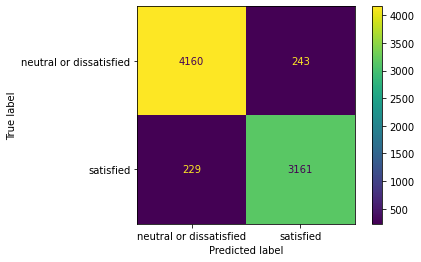

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

def drzewo_decyzyjne(df): # funkcja do obsługi modelu dla podanych danych
    all_inputs = df[["Gender","Customer Type","Age","Type of Travel","Class","Flight Distance",
                    "Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
                    "Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
                    "On-board service","Leg room service","Baggage handling","Checkin service",
                    "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]].values
    all_classes = df["satisfaction"].values

    (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)
    # podział na częsci testowe

    '''
    Wersja dla danych podstawowych, z nielimitowaną liczbą gałęzi
    '''
    # model i jego dokładność
    dtc = DecisionTreeClassifier()

    dtc.fit(train_inputs, train_classes)
    dtc.score(test_inputs, test_classes)

    print(f"Dokładność klasyfikacji na zbiorze testowym, drzewo bez limitu: {dtc.score(test_inputs, test_classes)} %")

    # macierz błędu
    y_pred = dtc.predict(test_inputs)
    macierz = confusion_matrix(test_classes, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=macierz, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

df = data_basic
drzewo_decyzyjne(df)

Dokładność klasyfikacji na zbiorze testowym, drzewo przycięte: 0.8874631079173617 %


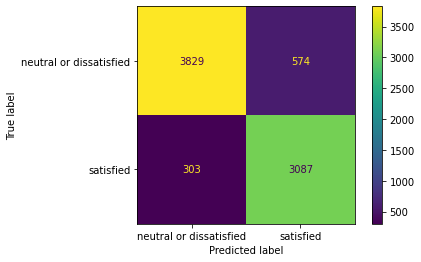

In [30]:
'''
Wersja dla danych podstawowych z przyciętymi gałęziami (do 3), 
'''
def drzewo_przyciete(df):
    all_inputs = df[["Gender","Customer Type","Age","Type of Travel","Class","Flight Distance",
                    "Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
                    "Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
                    "On-board service","Leg room service","Baggage handling","Checkin service",
                    "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]].values
    all_classes = df["satisfaction"].values

    (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

    # drzewo ograniczone do 3 'poziomów'
    dtc = DecisionTreeClassifier(max_depth=3)

    dtc.fit(train_inputs, train_classes)
    dtc.score(test_inputs, test_classes)

    print(f"Dokładność klasyfikacji na zbiorze testowym, drzewo przycięte: {dtc.score(test_inputs, test_classes)} %")

    # macierz błędu
    y_pred = dtc.predict(test_inputs)
    macierz = confusion_matrix(test_classes, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=macierz, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

df = data_basic
drzewo_przyciete(df)



### 3.1.2 Baza pełna

Dokładność klasyfikacji na zbiorze testowym, drzewo bez limitu: 0.9287822404722187 %


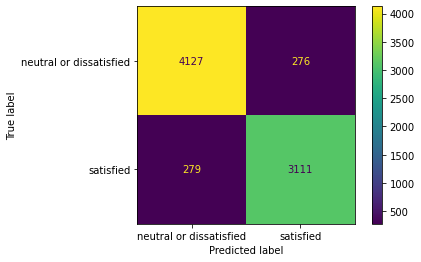

In [31]:
df = data_full
drzewo_decyzyjne(df)

Dokładność klasyfikacji na zbiorze testowym, drzewo przycięte: 0.8832285384319261 %


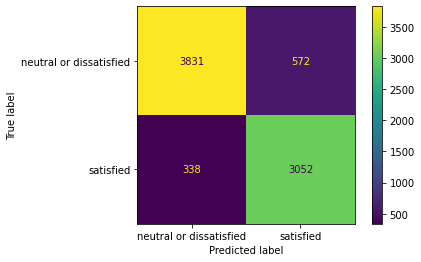

In [32]:
df =data_full
drzewo_przyciete(df)

Wyniki dla obu baz dla nieograniczonych drzew są bardzo obiecujące. Mają stosunkowo mało źle ocenionych przypadków. Wersja ograniczona do 3 poziomów osiąga znacznie gorsze wyniki, co oznacza, że drzewo powinno być bardziej rozgałęzione.
## 3.2 Naiwny Bayes
### 3.2.1 Baza Podstawowa

Dokładność klasyfikacji na zbiorze testowym, Naive Bayers: 0.8620556910047479 %


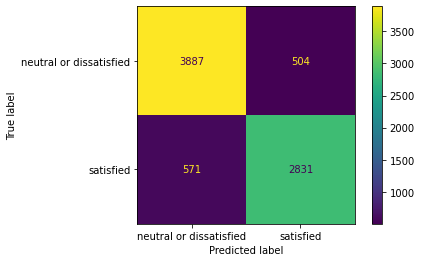

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

def bayes(df):
    # podział danych
    (train_set, test_set) = train_test_split(df, train_size=0.7)

    # Macierz zmiennych objaśniających i wektor zmiennej celu dla zbioru treningowego
    X_train = train_set.iloc[:, :-1].values
    y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    y_test = test_set.iloc[:, -1].values

    # model
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    # dokładność i macierz
    acc_nb = accuracy_score(y_test, y_pred)
    macierz = confusion_matrix(y_test,y_pred)

    # wyświetlanie
    print("Dokładność klasyfikacji na zbiorze testowym, Naive Bayers:", acc_nb ,"%")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=macierz, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

df = data_basic
bayes(df)

### 3.2.2 Baza pełna

Dokładność klasyfikacji na zbiorze testowym, Naive Bayers: 0.8693699473886821 %


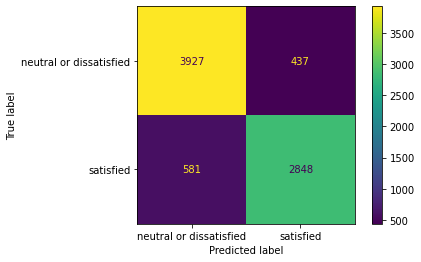

In [35]:
df = data_full
bayes(df)

Klasyfikatorowi NB brakuje zdolności do wykrywania złożonych zależności między cechami, co wpłynęło na wyniki rzędu 86-87%. 
## 3.3 K-Najbliższych sąsiadów

### 3.3.1 Baza podstawowa

3-NN:
Dokładność klasyfikacji na zbiorze testowym, 3-NN: 0.6808674451430771 %
5-NN:
Dokładność klasyfikacji na zbiorze testowym, 5-NN: 0.6931861927370717 %
11-NN:
Dokładność klasyfikacji na zbiorze testowym, 11-NN: 0.6992172462466316 %


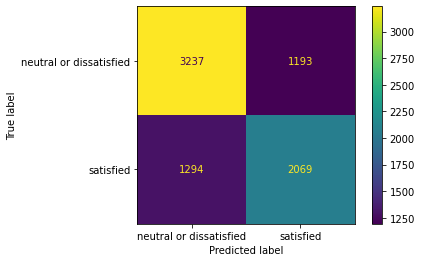

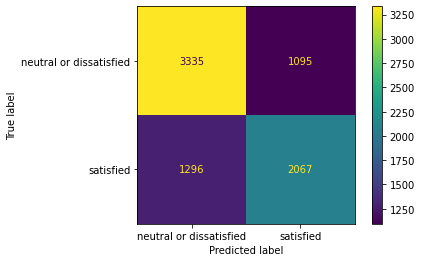

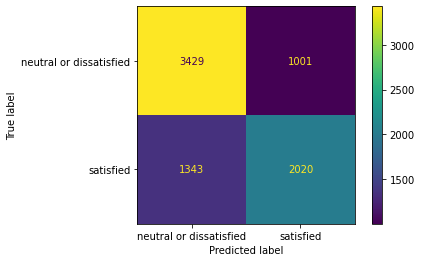

In [37]:
from sklearn.neighbors import KNeighborsClassifier

def k_nn(df):
    # podział danych
    (train_set, test_set) = train_test_split(df, train_size=0.7)

    # Macierz zmiennych objaśniających i wektor zmiennej celu dla zbioru treningowego
    X_train = train_set.iloc[:, :-1].values
    y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    y_test = test_set.iloc[:, -1].values

        
    # 3-NN
    knn3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
    knn3.fit(X_train, y_train)
    y_pred = knn3.predict(X_test)

    acc_3 = accuracy_score(y_test, y_pred)
    mac = confusion_matrix(y_test,y_pred)

    print("3-NN:")
    print("Dokładność klasyfikacji na zbiorze testowym, 3-NN:", acc_3 ,"%")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=mac, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

    # 5-NN
    knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn5.fit(X_train, y_train)
    y_pred = knn5.predict(X_test)

    acc_5 = accuracy_score(y_test, y_pred)
    mac = confusion_matrix(y_test,y_pred)

    print("5-NN:")
    print("Dokładność klasyfikacji na zbiorze testowym, 5-NN:", acc_5 ,"%")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=mac, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

    # 11-NN
    knn11 = KNeighborsClassifier(n_neighbors=11, weights='distance')
    knn11.fit(X_train, y_train)
    y_pred = knn11.predict(X_test)

    acc_11 = accuracy_score(y_test, y_pred)
    mac = confusion_matrix(y_test,y_pred)

    print("11-NN:")
    print("Dokładność klasyfikacji na zbiorze testowym, 11-NN:", acc_11 ,"%")
    cm_display = ConfusionMatrixDisplay(confusion_matrix=mac, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()
        
df = data_basic
k_nn(df)
# macierze są wyświetlane w kolejności: 3-NN, 5-NN, 11-NN

### 3.3.2 Baza pełna

3-NN:
Dokładność klasyfikacji na zbiorze testowym, 3-NN: 0.6967791607853202 %
5-NN:
Dokładność klasyfikacji na zbiorze testowym, 5-NN: 0.6997305273963814 %
11-NN:
Dokładność klasyfikacji na zbiorze testowym, 11-NN: 0.6994738868215065 %


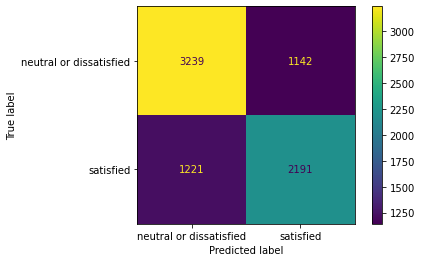

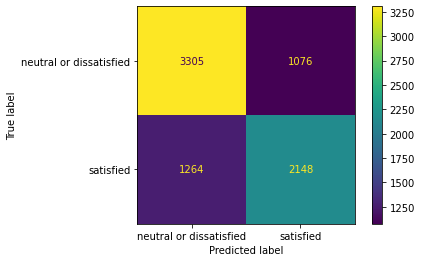

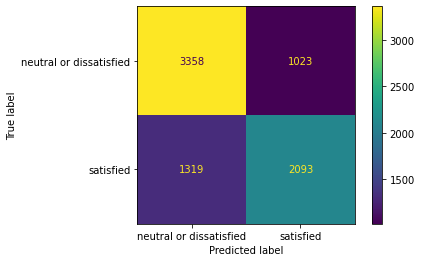

In [38]:
df = data_full
k_nn(df)
# macierze są wyświetlane w kolejności: 3-NN, 5-NN, 11-NN

W obu wersjach baz, klasyfikatory k-NN, osiągają wyniki rzędu 68-70%. Być może dobrane *k* nie były wystarczająco dobrymi wartościami w stosunku do dobranego problemu.
## 3.4 Sieć neuronowa
Klasyfikujemy bazy danych na 4 modelach, o zróżnicowanej strukturze.
- Model A - model sieci o jednej warstwie ukrytej, ma 6 neuronów, z funkcją aktywacji ReLU, optymalizator Adam
- Model B - model sieci o jednej warstwie ukrytej, ma 4 neuronów, z funkcją aktywacji Sigmoid, optymalizator Adam
- Model C - model sieci o dwóch warstwach ukrytych, pierwsza ma 6 neuronów, druga 3 neurony, z funkcją aktywacji ReLU, optymalizator Adam
- Model D - model sieci  o jednej warstwie ukrytej, ma 4 neuronów, z funkcją aktywacji Sigmoid, optymalizator sgd

### 3.4.1 Baza podstawowa

244/244 [==============================] - 2s 6ms/step
Model A adam, relu
Dokladność: 0.9239060695495958 %


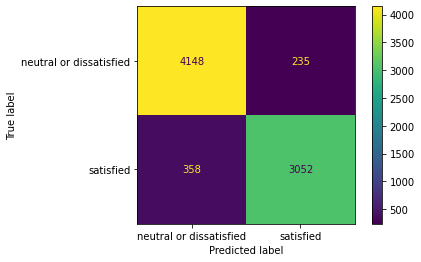

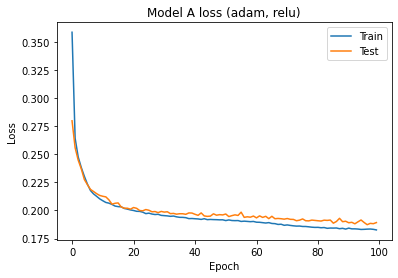

In [29]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def statystyki(): # funkcja zajmująca się wyświetlaniem szczegółów modelu
    # Dokładność
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_test_classes = y_test.argmax(axis=-1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    print(f"Model {model_type} {optimizer_name}, {activation_name}")
    print("Dokladność:", accuracy,"%")

    # Macierz błędu
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

    # Wykres krzywej uczenia się
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'Model {model_type} loss ({optimizer_name}, {activation_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Wczytanie danych
df = data_basic
pd.set_option('display.max_columns', None)

# Podział na cechy i etykiety
target_column = ['satisfaction']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()

X = df[predictors].values
y = df[target_column].values.ravel()

# Kodowanie etykiet kategorialnych
le = LabelEncoder()
y = le.fit_transform(y)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Konwersja etykiet na wektory kategorialne
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model A - Baza podstawowa
model_type = 'A'
optimizer_name = 'adam'
activation_name =  'relu'
model = Sequential()
model.add(Dense(6, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# wyświetlenie macierzy i dokładności
statystyki()


244/244 [==============================] - 0s 1ms/step
Model B adam, sigmoid
Dokladność: 0.9232644681124086 %


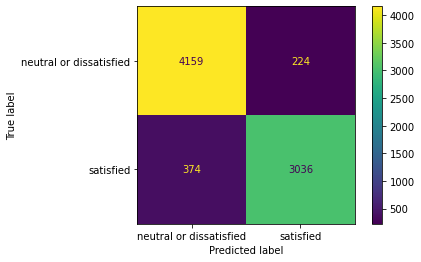

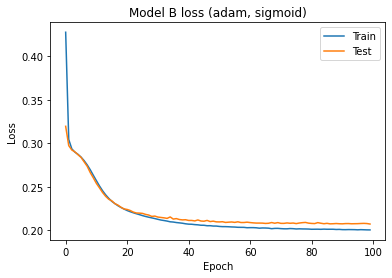

In [30]:
# Model B - Baza podstawowa
model_type = 'B'
optimizer_name = 'adam'
activation_name =  'sigmoid'
model = Sequential()
model.add(Dense(4, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

244/244 [==============================] - 1s 5ms/step
Model C adam, relu
Dokladność: 0.9182599769023483 %


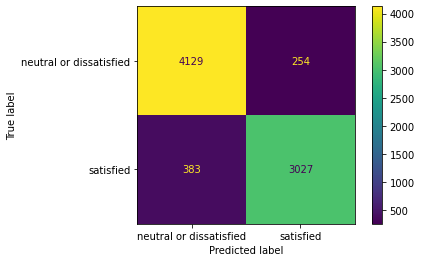

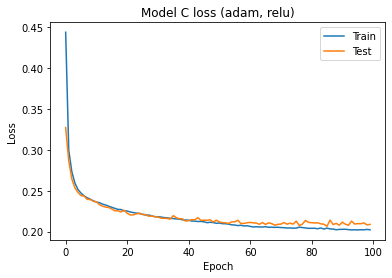

In [31]:
# Model C - Baza podstawowa
model_type = 'C'
optimizer_name = 'adam'
activation_name =  'relu'
model = Sequential()
model.add(Dense(6, input_dim=22, activation=activation_name))
model.add(Dense(3, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

244/244 [==============================] - 0s 1ms/step
Model D sgd, sigmoid
Dokladność: 0.9190298986269729 %


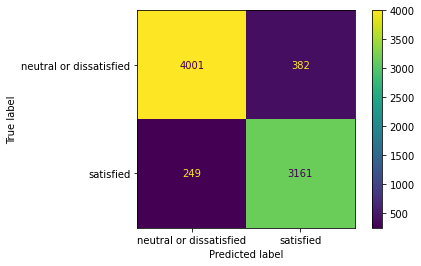

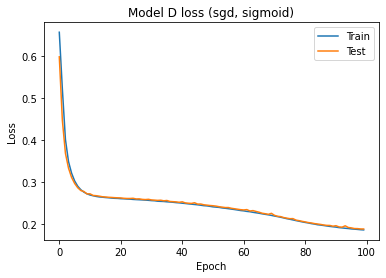

In [46]:
# Model D - Baza podstawowa
model_type = 'D'
optimizer_name = 'sgd'
activation_name =  'sigmoid'
model = Sequential()
model.add(Dense(4, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

### 3.4.2 Baza pełna

244/244 [==============================] - 0s 1ms/step
Model A adam, relu
Dokladność: 0.9208263826510972 %


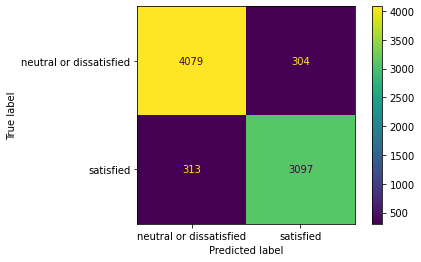

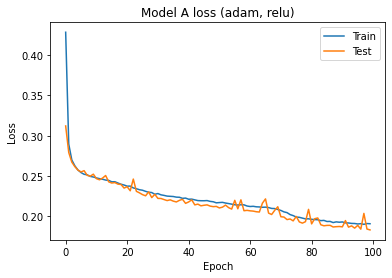

In [41]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def statystyki():
    # Dokładność
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_test_classes = y_test.argmax(axis=-1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    print(f"Model {model_type} {optimizer_name}, {activation_name}")
    print("Dokladność:", accuracy,"%")

    # Macierz błędu
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtc.classes_)
    cm_display.plot()
    plt.show()

    # Wykres krzywej uczenia się
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'Model {model_type} loss ({optimizer_name}, {activation_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Wczytanie danych
df = data_full
pd.set_option('display.max_columns', None)

# Podział na cechy i etykiety
target_column = ['satisfaction']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()

X = df[predictors].values
y = df[target_column].values.ravel()

# Kodowanie etykiet kategorialnych
le = LabelEncoder()
y = le.fit_transform(y)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Konwersja etykiet na wektory kategorialne
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model A - Baza pełna
model_type = 'A'
optimizer_name = 'adam'
activation_name =  'relu'
model = Sequential()
model.add(Dense(6, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

244/244 [==============================] - 0s 2ms/step
Model B adam, sigmoid
Dokladność: 0.9277556781727191 %


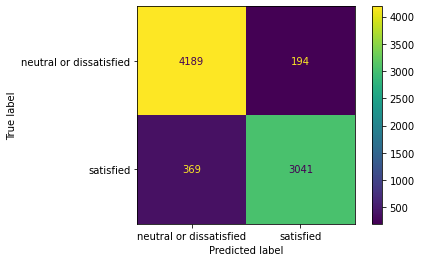

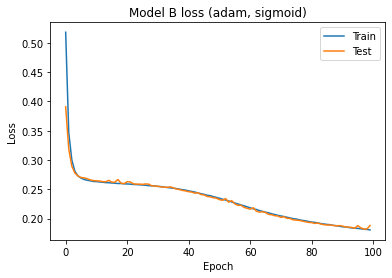

In [42]:
# Model B - Baza pełna
model_type = 'B'
optimizer_name = 'adam'
activation_name =  'sigmoid'
model = Sequential()
model.add(Dense(4, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

244/244 [==============================] - 0s 1ms/step
Model C adam, relu
Dokladność: 0.9115873219556012 %


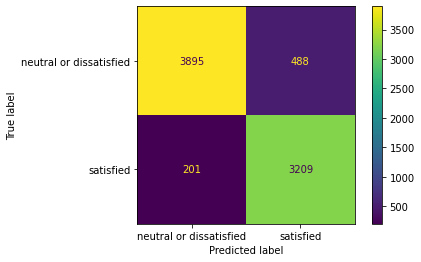

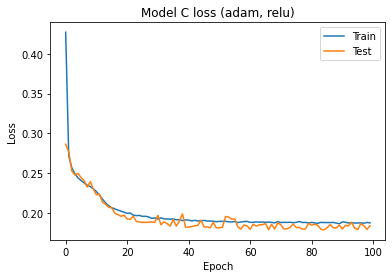

In [43]:
# Model C - Baza pełna
model_type = 'C'
optimizer_name = 'adam'
activation_name =  'relu'
model = Sequential()
model.add(Dense(6, input_dim=22, activation=activation_name))
model.add(Dense(3, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

244/244 [==============================] - 0s 1ms/step
Model D sgd, sigmoid
Dokladność: 0.9190298986269729 %


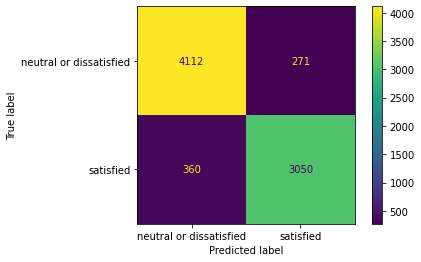

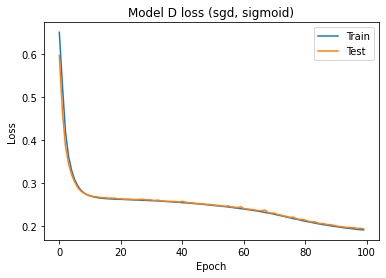

In [47]:
# Model D - Baza pełna
model_type = 'D'
optimizer_name = 'sgd'
activation_name =  'sigmoid'
model = Sequential()
model.add(Dense(4, input_dim=22, activation=activation_name))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

statystyki()

Wynki dla wszystkich sieci neuronowych są bardzo obiecujące. Każda ma wynik przynajmniej 91% dla obu baz danych. Dobre wyniki osiągają modele z optymalizatorem Adam. Czasami dochodzi do minimalnych przeuczeń modeli, lecz są one w małym stopniu odbiegające od siebie. Być może da się osiągnąć jeszcze lepsze wyniki zwiększając wartości *epochs* na większe niż 100. Warto też zaznaczyć, że czas obliczeń dla danych znormalizowanych (data_full) był o 40-50% mniejszy niż dla danych podstawowych.
# 4. Podsumowanie
Tak prezentują się wyniki dla poszczególnych klasyfikatorów:

| **Klasyfikator**        | **Poprawność dla podstawowych** | **Poprawność dla pełnych** |
|-------------------------|---------------------------------|----------------------------|
| Decision Tree           | 0.93943                         | 0.92879                    |
| Decision Tree przycięte | 0.88746                         | 0.88323                    |
| Naive Bayes             | 0.86206                         | 0.86937                    |
| 3-NN                    | 0.68087                         | 0.69678                    |
| 5-NN                    | 0.69319                         | 0.69973                    |
| 11-NN                   | 0.69922                         | 0.69947                    |
| Sieć neuronowa A        | 0.92391                         | 0.92083                    |
| Sieć neuronowa B        | 0.92326                         | 0.92776                    |
| Sieć neuronowa C        | 0.91826                         | 0.91159                    |
| Sieć neuronowa D        | 0.91903                         | 0.91903                    |

Na podstawie tabeli można wywnioskować, że najlepsze klasyfikatory dla danych podstawowych to:
1. Decision Tree (pełne)
2. Sieć neuronowa A (sieć o jednej warstwie ukrytej, ma 6 neuronów, z funkcją aktywacji ReLU, optymalizator Adam)
3. Sieć neuronowa B (sieć o jednej warstwie ukrytej, ma 4 neuronów, z funkcją aktywacji Sigmoid, optymalizator Adam)

Dla danych pełnych najlepsze klasyfikatory to:
1. Decision Tree (pełne)
2. Sieć neuronowa B (sieć o jednej warstwie ukrytej, ma 4 neuronów, z funkcją aktywacji Sigmoid, optymalizator Adam)
3. Sieć neuronowa A (sieć o jednej warstwie ukrytej, ma 6 neuronów, z funkcją aktywacji ReLU, optymalizator Adam)

Poprawność można przedstawić na wykresie:

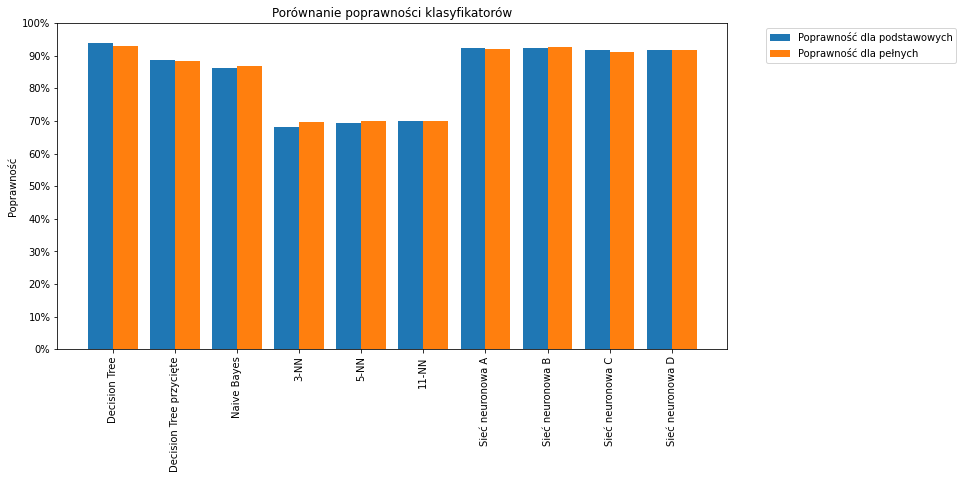

In [51]:
import matplotlib.pyplot as plt

klasyfikator = ['Decision Tree', 'Decision Tree przycięte', 'Naive Bayes', '3-NN', '5-NN', '11-NN', 'Sieć neuronowa A', 'Sieć neuronowa B', 'Sieć neuronowa C', 'Sieć neuronowa D']
poprawnosc_podstawowe = [0.93943, 0.88746, 0.86206, 0.68087, 0.69319, 0.69922, 0.92391, 0.92326, 0.91826, 0.91903]
poprawnosc_pelne = [0.92879, 0.88323, 0.86937, 0.69678, 0.69973, 0.69947, 0.92083, 0.92776, 0.91159, 0.91903]

x = range(len(klasyfikator))

plt.figure(figsize=(12, 6)) 
plt.bar(x, poprawnosc_podstawowe, color='tab:blue', width=0.4, label='Poprawność dla podstawowych')
plt.bar([i+0.4 for i in x], poprawnosc_pelne, color='tab:orange', width=0.4, label='Poprawność dla pełnych')

plt.xticks([i+0.2 for i in x], klasyfikator, rotation=90)
plt.ylabel("Poprawność")
plt.yticks([i/10 for i in range(11)], ['{}%'.format(i*10) for i in range(11)]) 
plt.ylim(0, 1.0) 

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title("Porównanie poprawności klasyfikatorów")
plt.show()

Wyniki dla obu zestawów danych są dość bliskie. Powodować może to fakt, że dane przed preprocessingiem były już dobrze przygotowane i nie wymagały dużo koniecznych zmian. W 6 przypadkach bardziej zmodyfikowane dane osiągają lepszy lub równy wynik.

Najlepszym klasyfikatorem, dla tego zestawu danych, okazało się **Drzewo Decyzyjne** z nielimitowaną ilością poziomów. Warto też zauważyć dobry wynik sieci neuronowych z jedną warstwą ukrytą i optymalizatorem Adam. Zapewne przy zmianach w wartościach można osiągnąć jeszcze lepsze wyniki.

Bibliografia:
- https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
- https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
- https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
- Wykład 08

**Autor: Karol Krawczykiewicz**